In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set max columns to None (display all)
pd.set_option('display.max_columns', None)

In [21]:
df = pd.read_csv('final_dataset.csv')

In [22]:
df.head()

,eid,Gender,Smoking,BMI,Age,SBP,DBP,HDL cholesterol,Triglycerides,Walking activity,CRP,LDL cholesterol,statin use,Albumin,ALP,ALT,AST,GGT,Total_bilirubin,Diabetes,Glycated_haemoglobin,Glucose,Urate,Platelet_count
0,1000013,1,2.0,24.9680,62.0,157.0,86.0,0.981,3.141,3.0,3.97,3.020,0,43.43,82.2,21.21,20.2,60.9,6.54,0.0,36.108174,4.540,266.6,309.3
1,1000024,1,0.0,27.8769,61.0,156.0,87.0,1.484,1.703,5.0,3.60,4.686,0,41.41,51.5,14.31,21.2,29.4,10.54,0.0,34.800000,4.860,319.6,253.6
2,1000036,1,0.0,28.5211,47.0,143.5,87.0,1.108,0.725,5.0,0.79,2.889,0,41.67,114.2,22.60,21.9,13.1,7.28,0.0,32.100000,5.093,318.3,275.0
3,1000048,0,0.0,24.7781,69.0,160.5,90.5,1.836,2.149,7.0,0.43,3.218,0,45.55,59.7,18.08,23.2,15.5,10.40,0.0,33.200000,5.206,215.3,170.5
4,1000067,1,0.0,27.9601,56.0,142.5,86.0,1.221,1.385,3.0,1.01,4.000,0,44.29,95.9,56.04,36.5,67.2,7.37,0.0,38.200000,6.456,354.6,232.6


## Gender & Statin use dataset breakdown

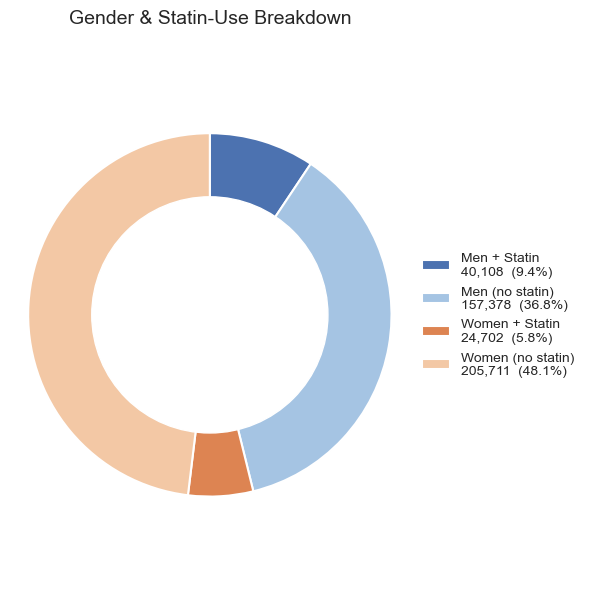

In [23]:

# --- counts --------------------------------------------------------------
male_yes    = ((df['Gender'] == 1)   & (df['statin use'] == 1)).sum()
male_no     = ((df['Gender'] == 1)   & (df['statin use'] == 0)).sum()
female_yes  = ((df['Gender'] == 0) & (df['statin use'] == 1)).sum()
female_no   = ((df['Gender'] == 0) & (df['statin use'] == 0)).sum()

sizes  = [male_yes, male_no, female_yes, female_no]
labels = ['Men + Statin', 'Men (no statin)',
          'Women + Statin', 'Women (no statin)']

# percentages for legend
total = sum(sizes)
legend_labels = [f'{lab}\n{n:,}  ({n/total:.1%})'
                 for lab, n in zip(labels, sizes)]

# --- plot ---------------------------------------------------------------
colors = ['#4C72B0', '#A5C4E3', '#DD8452', '#F3C8A5']   # two blues, two oranges

fig, ax = plt.subplots(figsize=(6, 6))
wedges, _ = ax.pie(sizes,
                   startangle=90,
                   counterclock=False,
                   colors=colors,
                   wedgeprops={'edgecolor': 'white', 'linewidth': 1.5})

# donut hole
centre_circle = plt.Circle((0, 0), 0.65, fc='white')
ax.add_artist(centre_circle)

# legend outside
ax.legend(wedges, legend_labels,
          loc='center left', bbox_to_anchor=(1, 0.5), frameon=False,
          fontsize=10)

ax.set_title('Gender & Statin-Use Breakdown', fontsize=14, pad=20)
ax.axis('equal')  # keep it a circle
plt.tight_layout()

fig.savefig('gender_statin_donut.png', dpi=300,
            transparent=True)

plt.show()


## Age Distribution

C:\Users\ronra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


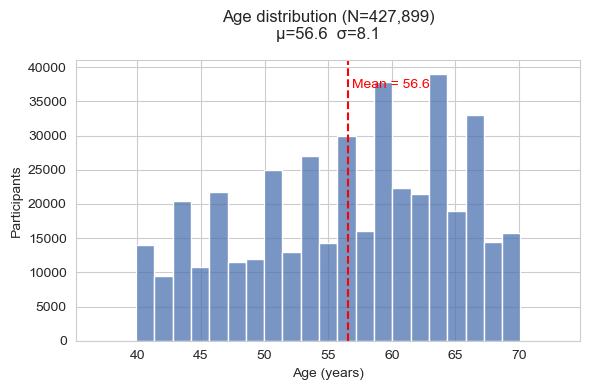

In [24]:
age_mean = df['Age'].mean()
age_sd   = df['Age'].std()

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(6, 4))

sns.histplot(df['Age'], bins=25, ax=ax, color='#4C72B0', edgecolor='white')
ax.set_title(f'Age distribution (N={len(df):,})\nμ={age_mean:.1f}  σ={age_sd:.1f}', pad=15)
ax.set_xlabel('Age (years)')
ax.set_ylabel('Participants')

# Annotate mean line
ax.axvline(age_mean, color='red', linestyle='--')
ax.text(age_mean + 0.3, ax.get_ylim()[1]*0.9, f'Mean = {age_mean:.1f}', color='red')

fig.tight_layout()
fig.savefig('age_distribution.png', dpi=300)

plt.show()

C:\Users\ronra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


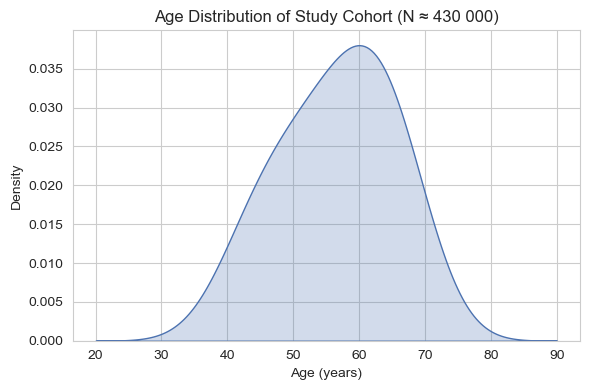

In [27]:

sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(6,4))
sns.kdeplot(df['Age'], fill=True, bw_method=0.7, color='#4C72B0', ax=ax)
ax.set_title('Age Distribution of Study Cohort (N ≈ 430 000)')
ax.set_xlabel('Age (years)'); ax.set_ylabel('Density')
fig.tight_layout()
fig.savefig('age_distribution.png', dpi=300, transparent=True, facecolor='none')
plt.show()

## Age x Sex statin users breakdown

C:\Users\ronra\AppData\Local\Temp\ipykernel_22216\454844670.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['age_band', 'Gender'])


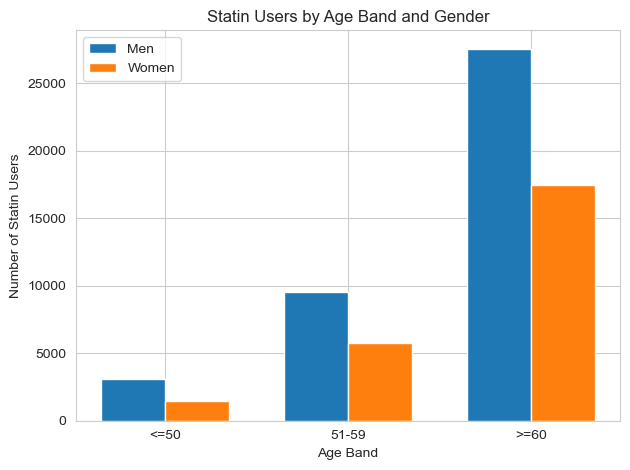

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Map Gender (assuming binary: 1=Men, 0=Women)
df['Gender'] = df['Gender'].map({1: 'Men', 0: 'Women'})

# Step 2: Define custom age bands
bins = [0, 50, 59, float('inf')]
labels = ['<=50', '51-59','>=60']
df['age_band'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

# Step 3: Group statin users by age band and gender
grouped = (
    df[df['statin use'] == 1]
    .groupby(['age_band', 'Gender'])
    .size()
    .unstack(fill_value=0)
    .reindex(index=labels)  # ensures correct order
)

# Step 4: Plot grouped bar chart
x = range(len(grouped))
bar_width = 0.35

plt.bar([i - bar_width/2 for i in x], grouped['Men'], width=bar_width, label='Men')
plt.bar([i + bar_width/2 for i in x], grouped['Women'], width=bar_width, label='Women')

plt.xticks(x, grouped.index)
plt.xlabel('Age Band')
plt.ylabel('Number of Statin Users')
plt.title('Statin Users by Age Band and Gender')
plt.legend()
plt.tight_layout()
plt.show()
